import the libraries

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten 
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

Image Augmentation

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
x_train=train_datagen.flow_from_directory(r'/content/drive/MyDrive/Dataset Plant Disease/fruit-dataset/fruit-dataset/train',target_size=(128,128),class_mode='categorical',batch_size=24)

Found 5384 images belonging to 6 classes.


In [5]:
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/Dataset Plant Disease/fruit-dataset/fruit-dataset/test",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 1686 images belonging to 6 classes.


Create the model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

Add Layers

In [7]:
model=Sequential()

In [9]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [11]:
32*(3*3*3+1)
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [12]:
model.add(Dense(6,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
len(x_train)

225

In [13]:
1238/24

51.583333333333336

fit the model

In [14]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
225/225 [==============================] - 2639s 12s/step - loss: 1.3354 - accuracy: 0.7652 - val_loss: 0.4907 - val_accuracy: 0.8215
Epoch 2/10
225/225 [==============================] - 172s 762ms/step - loss: 0.2829 - accuracy: 0.9008 - val_loss: 0.1736 - val_accuracy: 0.9383
Epoch 3/10
225/225 [==============================] - 179s 794ms/step - loss: 0.2056 - accuracy: 0.9296 - val_loss: 0.1954 - val_accuracy: 0.9312
Epoch 4/10
225/225 [==============================] - 172s 765ms/step - loss: 0.1694 - accuracy: 0.9383 - val_loss: 0.2187 - val_accuracy: 0.9253
Epoch 5/10
225/225 [==============================] - 179s 796ms/step - loss: 0.1539 - accuracy: 0.9461 - val_loss: 0.1366 - val_accuracy: 0.9543
Epoch 6/10
225/225 [==============================] - 172s 765ms/step - loss: 0.1428 - accuracy: 0.9491 - val_loss: 0.1668 - val_accuracy: 0.9442
Epoch 7/10
225/225 [==============================] - 175s 774ms/step - loss: 0.1333 - accuracy: 0.9538 - val_loss: 0.1976 - 

save the model

In [16]:
model.save('fruitdata.h5')

Testing the model

In [17]:
model=load_model('fruitdata.h5')

In [18]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [19]:
img=image.load_img(r"/content/drive/MyDrive/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___healthy/01efa999-757d-487e-8250-27c7854c0ca8___RS_HL 7515.JPG",target_size=(128,128))

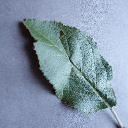

In [21]:
img

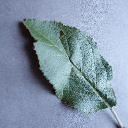

In [22]:
img=image.load_img(r"/content/drive/MyDrive/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___healthy/01efa999-757d-487e-8250-27c7854c0ca8___RS_HL 7515.JPG",target_size=(128,128))
img

In [23]:
x=image.img_to_array(img)
x

array([[[111., 122., 152.],
        [110., 121., 151.],
        [118., 129., 159.],
        ...,
        [184., 198., 225.],
        [187., 201., 228.],
        [180., 194., 221.]],

       [[124., 135., 165.],
        [117., 128., 158.],
        [121., 132., 162.],
        ...,
        [178., 192., 219.],
        [191., 205., 232.],
        [179., 193., 220.]],

       [[123., 134., 164.],
        [117., 128., 158.],
        [114., 125., 155.],
        ...,
        [180., 194., 221.],
        [189., 203., 230.],
        [179., 193., 220.]],

       ...,

       [[114., 128., 157.],
        [118., 132., 161.],
        [125., 139., 168.],
        ...,
        [177., 191., 217.],
        [187., 199., 223.],
        [180., 192., 216.]],

       [[120., 134., 163.],
        [125., 139., 168.],
        [122., 136., 165.],
        ...,
        [189., 197., 216.],
        [188., 197., 214.],
        [186., 195., 210.]],

       [[127., 141., 170.],
        [118., 132., 161.],
        [118., 1

In [24]:
x=np.expand_dims(x,axis=0)
x

array([[[[111., 122., 152.],
         [110., 121., 151.],
         [118., 129., 159.],
         ...,
         [184., 198., 225.],
         [187., 201., 228.],
         [180., 194., 221.]],

        [[124., 135., 165.],
         [117., 128., 158.],
         [121., 132., 162.],
         ...,
         [178., 192., 219.],
         [191., 205., 232.],
         [179., 193., 220.]],

        [[123., 134., 164.],
         [117., 128., 158.],
         [114., 125., 155.],
         ...,
         [180., 194., 221.],
         [189., 203., 230.],
         [179., 193., 220.]],

        ...,

        [[114., 128., 157.],
         [118., 132., 161.],
         [125., 139., 168.],
         ...,
         [177., 191., 217.],
         [187., 199., 223.],
         [180., 192., 216.]],

        [[120., 134., 163.],
         [125., 139., 168.],
         [122., 136., 165.],
         ...,
         [189., 197., 216.],
         [188., 197., 214.],
         [186., 195., 210.]],

        [[127., 141., 170.],
       

In [25]:
x

array([[[[111., 122., 152.],
         [110., 121., 151.],
         [118., 129., 159.],
         ...,
         [184., 198., 225.],
         [187., 201., 228.],
         [180., 194., 221.]],

        [[124., 135., 165.],
         [117., 128., 158.],
         [121., 132., 162.],
         ...,
         [178., 192., 219.],
         [191., 205., 232.],
         [179., 193., 220.]],

        [[123., 134., 164.],
         [117., 128., 158.],
         [114., 125., 155.],
         ...,
         [180., 194., 221.],
         [189., 203., 230.],
         [179., 193., 220.]],

        ...,

        [[114., 128., 157.],
         [118., 132., 161.],
         [125., 139., 168.],
         ...,
         [177., 191., 217.],
         [187., 199., 223.],
         [180., 192., 216.]],

        [[120., 134., 163.],
         [125., 139., 168.],
         [122., 136., 165.],
         ...,
         [189., 197., 216.],
         [188., 197., 214.],
         [186., 195., 210.]],

        [[127., 141., 170.],
       

In [26]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 201ms/step


In [27]:
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']
index[y[0]]

'Apple___healthy'

In [28]:
img=image.load_img(r"/content/drive/MyDrive/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___healthy/01efa999-757d-487e-8250-27c7854c0ca8___RS_HL 7515.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']
index[y[0]]

1/1 [==============================] - 0s 48ms/step


'Apple___healthy'